In [2]:
import torch
import torch.nn.functional as F
def c_loss(logits):
    probabilities = F.softmax(logits, dim=1)
    print(probabilities.shape) 
    one_hot_predictions = torch.argmax(probabilities, dim=1)
    
    print(one_hot_predictions.shape)
    print(torch.abs(one_hot_predictions[:, 1:] - one_hot_predictions[:, :-1]).shape)
    product_prob = torch.prod(probabilities, dim=1)
    # print('product_prob', product_prob)
    # Calculate changes between adjacent elements in the sequence
    changes = torch.abs(one_hot_predictions[:, 1:]*product_prob[:, 1:] - one_hot_predictions[:, :-1]*product_prob[:, :-1])
    # Sum the changes to get the penalty term
    # print('res 1', torch.abs(one_hot_predictions[:, 1:] - one_hot_predictions[:, :-1]).sum(dim=1).float().mean())
    # print('res 2', torch.abs(1 - product_prob[:, 1:] - product_prob[:, :-1]).sum(dim=1).float().mean())
    penalty = changes.sum(dim=1).float().mean()
    return penalty + 1e-4

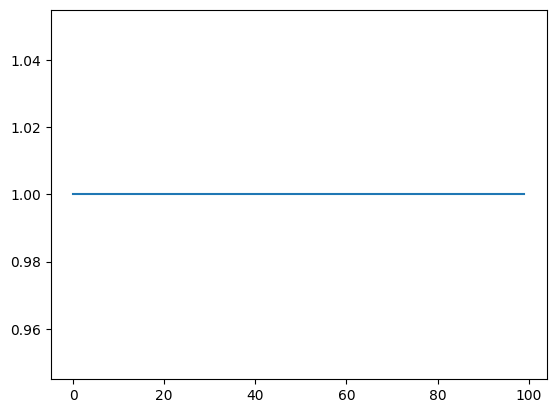

torch.Size([74, 2, 100])
torch.Size([74, 100])
torch.Size([74, 99])
best all 1 tensor(1.0000e-04)


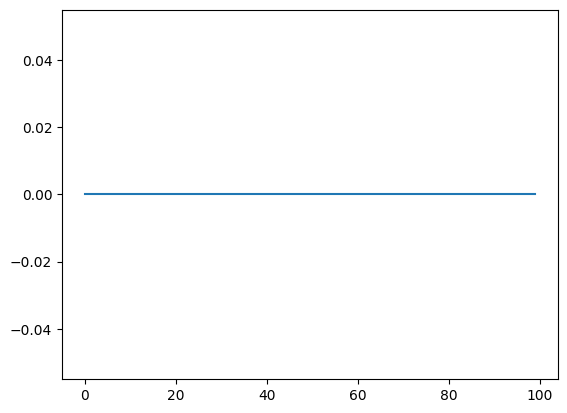

torch.Size([74, 2, 100])
torch.Size([74, 100])
torch.Size([74, 99])
best all 0 tensor(1.0000e-04)


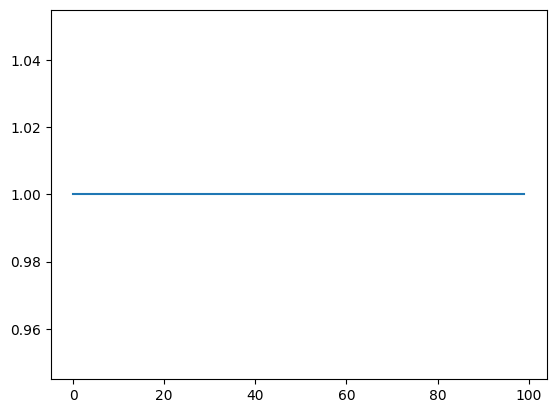

torch.Size([74, 2, 100])
torch.Size([74, 100])
torch.Size([74, 99])
medicore tensor(3.3272)


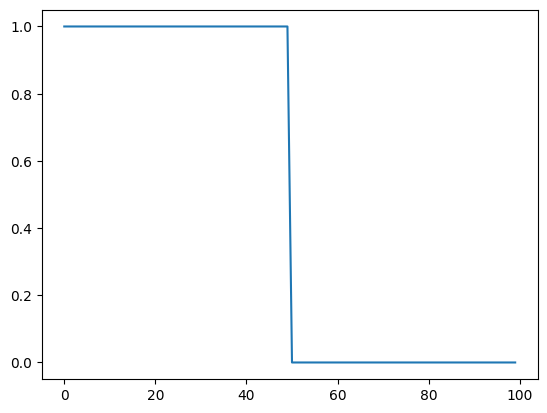

torch.Size([74, 2, 100])
torch.Size([74, 100])
torch.Size([74, 99])
sec best tensor(0.2140)


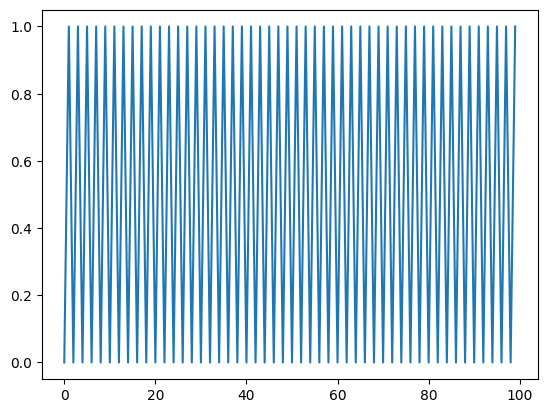

torch.Size([74, 2, 100])
torch.Size([74, 100])
torch.Size([74, 99])
worst tensor(21.1772)


In [3]:
from matplotlib import pyplot as plt


sample = torch.randn(74, 2, 100)
# [1,0 ] then [0,1] then [1,0] then [0,1] for sample in range(74):
for i in range(100):
    if i % 2 == 0:
        sample[:, 0, i] = .1
        sample[:, 1, i] = .9
    else:
        sample[:, 0, i] = .1
        sample[:, 1, i] = .9
plt.plot(torch.argmax(sample[0, :, :], dim=0).numpy())
plt.show()
print('best all 1', c_loss(sample))
sample = torch.randn(74, 2, 100)
# [1,0 ] then [0,1] then [1,0] then [0,1] for sample in range(74):
for i in range(100):
    if i % 2 == 0:
        sample[:, 0, i] = .9
        sample[:, 1, i] = .1
    else:
        sample[:, 0, i] = .9
        sample[:, 1, i] = .1
plt.plot(torch.argmax(sample[0, :, :], dim=0).numpy())
plt.show()
print('best all 0', c_loss(sample))
sample = torch.randn(74, 2, 100)
# [1,0 ] then [0,1] then [1,0] then [0,1] for sample in range(74):
for i in range(100):
    if i % 2 == 0:
        sample[:, 0, i] = .4
        sample[:, 1, i] = .6
    else:
        sample[:, 0, i] = .1
        sample[:, 1, i] = .9
plt.plot(torch.argmax(sample[0, :, :], dim=0).numpy())
plt.show()
print('medicore', c_loss(sample))

sample = torch.randn(74, 2, 100)
# [1,0 ] then [0,1] then [1,0] then [0,1] for sample in range(74):
for i in range(100):
    if i < 50:
        sample[:, 0, i] = .1
        sample[:, 1, i] = .9
    else:
        sample[:, 0, i] = .9
        sample[:, 1, i] = .1
plt.plot(torch.argmax(sample[0, :, :], dim=0).numpy())
plt.show()
print('sec best', c_loss(sample))

sample = torch.randn(74, 2, 100)
# [1,0 ] then [0,1] then [1,0] then [0,1] for sample in range(74):
for i in range(100):
    if i % 2 == 0:
        sample[:, 0, i] = .9
        sample[:, 1, i] = .1
    else:
        sample[:, 0, i] = .1
        sample[:, 1, i] = .9
plt.plot(torch.argmax(sample[0, :, :], dim=0).numpy())
plt.show()
print('worst', c_loss(sample))

